In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
# 런타임 재시작 없이 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [4]:
# 설치된 나눔 폰트 경로 찾기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)  # 폰트 등록
plt.rc('font', family='NanumGothic')  # 기본 폰트 설정

In [5]:
!pip install dask[dataframe]

1. 파일 업로드 및 라이브러리 임포트

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/sample_submission.csv')

2. EDA

In [8]:
train.head(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [7]:
# 1. 결측치 처리 (중앙값 사용)
cols_to_fill = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
for col in cols_to_fill:
    train[col].fillna(train[col].median(), inplace=True)

<ipython-input-7-e515de56c786>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [11]:
col_to_count = ['매물확인방식', '방향', '중개사무소', '제공플랫폼']
for col in col_to_count:
  print(train[col].value_counts())

매물확인방식
현장확인    1705
전화확인     382
서류확인     365
Name: count, dtype: int64
방향
남향     610
동향     605
서향     389
남동향    275
남서향    220
북향     198
북서향     80
북동향     75
Name: count, dtype: int64
중개사무소
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: count, Length: 279, dtype: int64
제공플랫폼
A플랫폼    958
B플랫폼    610
C플랫폼    350
D플랫폼    184
E플랫폼    142
F플랫폼     63
G플랫폼     59
H플랫폼     34
I플랫폼     20
J플랫폼     12
L플랫폼     10
K플랫폼      8
M플랫폼      2
Name: count, dtype: int64


In [8]:
# 2. 범주형 데이터 변환 (Label Encoding / One-Hot Encoding)
# 라벨인코딩 (중개사무소, 제공플랫폼)
label_cols = ['중개사무소', '제공플랫폼']
for col in label_cols:
    encoder = LabelEncoder()
    train[col] = encoder.fit_transform(train[col])

# 원핫 인코딩 (방향, 주차가능여부, 매물확인방식)
train = pd.get_dummies(train, columns=['방향', '주차가능여부', '매물확인방식'])

# 3. 날짜 처리 (연/월/일 분리 및 경과일 계산)
train['게재일'] = pd.to_datetime(train['게재일'])
train['게재_연도'] = train['게재일'].dt.year
train['게재_월'] = train['게재일'].dt.month
train['게재_일'] = train['게재일'].dt.day

# 경과일 추가 (예: 2025년 1월 1일 기준)
train['경과일'] = (pd.to_datetime('2025-02-22') - train['게재일']).dt.days

# 4. 이상치 처리 (로그 변환)
train['보증금_log'] = np.log1p(train['보증금'])
train['월세_log'] = np.log1p(train['월세'])

# 필요 없는 원본 컬럼 삭제
train.drop(['게재일', '보증금', '월세'], axis=1, inplace=True)

# 확인
print(train.head())

           ID  전용면적  해당층    총층   방수  욕실수  총주차대수  관리비  중개사무소  제공플랫폼  ...  \
0  TRAIN_0000  26.4  4.0  15.0  1.0  1.0   40.0   96    240      1  ...   
1  TRAIN_0001  26.4  3.0   4.0  2.0  1.0   10.0    0    228      3  ...   
2  TRAIN_0002  26.4  2.0   3.0  1.0  1.0   10.0    0    150      0  ...   
3  TRAIN_0003  36.3  3.0   9.0  2.0  1.0   13.0   10     31      0  ...   
4  TRAIN_0004  26.4  3.0   3.0  2.0  1.0   10.0    0     72      1  ...   

   주차가능여부_불가능  매물확인방식_서류확인  매물확인방식_전화확인  매물확인방식_현장확인  게재_연도  게재_월  게재_일  경과일  \
0       False        False        False         True   2024    10     9  136   
1        True        False        False         True   2024    12    26   58   
2        True        False         True        False   2024    11    28   86   
3       False        False        False         True   2024    11    26   88   
4        True        False        False         True   2024     6    25  242   

     보증금_log     월세_log  
0  19.813206  13.060490  
1  18.954246  12

In [13]:
train.head()

,ID,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,중개사무소,제공플랫폼,...,주차가능여부_불가능,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인,게재_연도,게재_월,게재_일,경과일,보증금_log,월세_log
0,TRAIN_0000,26.4,4.0,15.0,1.0,1.0,40.0,96,240,1,...,False,False,False,True,2024,10,9,136,19.813206,13.060490
1,TRAIN_0001,26.4,3.0,4.0,2.0,1.0,10.0,0,228,3,...,True,False,False,True,2024,12,26,58,18.954246,12.206078
2,TRAIN_0002,26.4,2.0,3.0,1.0,1.0,10.0,0,150,0,...,True,False,True,False,2024,11,28,86,18.551709,12.847929
3,TRAIN_0003,36.3,3.0,9.0,2.0,1.0,13.0,10,31,0,...,False,False,False,True,2024,11,26,88,18.912324,10.308986
4,TRAIN_0004,26.4,3.0,3.0,2.0,1.0,10.0,0,72,1,...,True,False,False,True,2024,6,25,242,19.661949,13.180634


In [ ]:
# 250223 여기까지

In [14]:
# 컬럼명 확인
print(train.columns)

Index(['ID', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '중개사무소',
       '제공플랫폼', '허위매물여부', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향',
       '방향_북서향', '방향_북향', '방향_서향', '주차가능여부_가능', '주차가능여부_불가능', '매물확인방식_서류확인',
       '매물확인방식_전화확인', '매물확인방식_현장확인', '게재_연도', '게재_월', '게재_일', '경과일', '보증금_log',
       '월세_log'],
      dtype='object')


In [15]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['ID', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '중개사무소', '제공플랫폼', '허위매물여부', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '주차가능여부_가능', '주차가능여부_불가능', '매물확인방식_서류확인', '매물확인방식_전화확인', '매물확인방식_현장확인', '게재_연도', '게재_월', '게재_일', '경과일', '보증금_log', '월세_log']


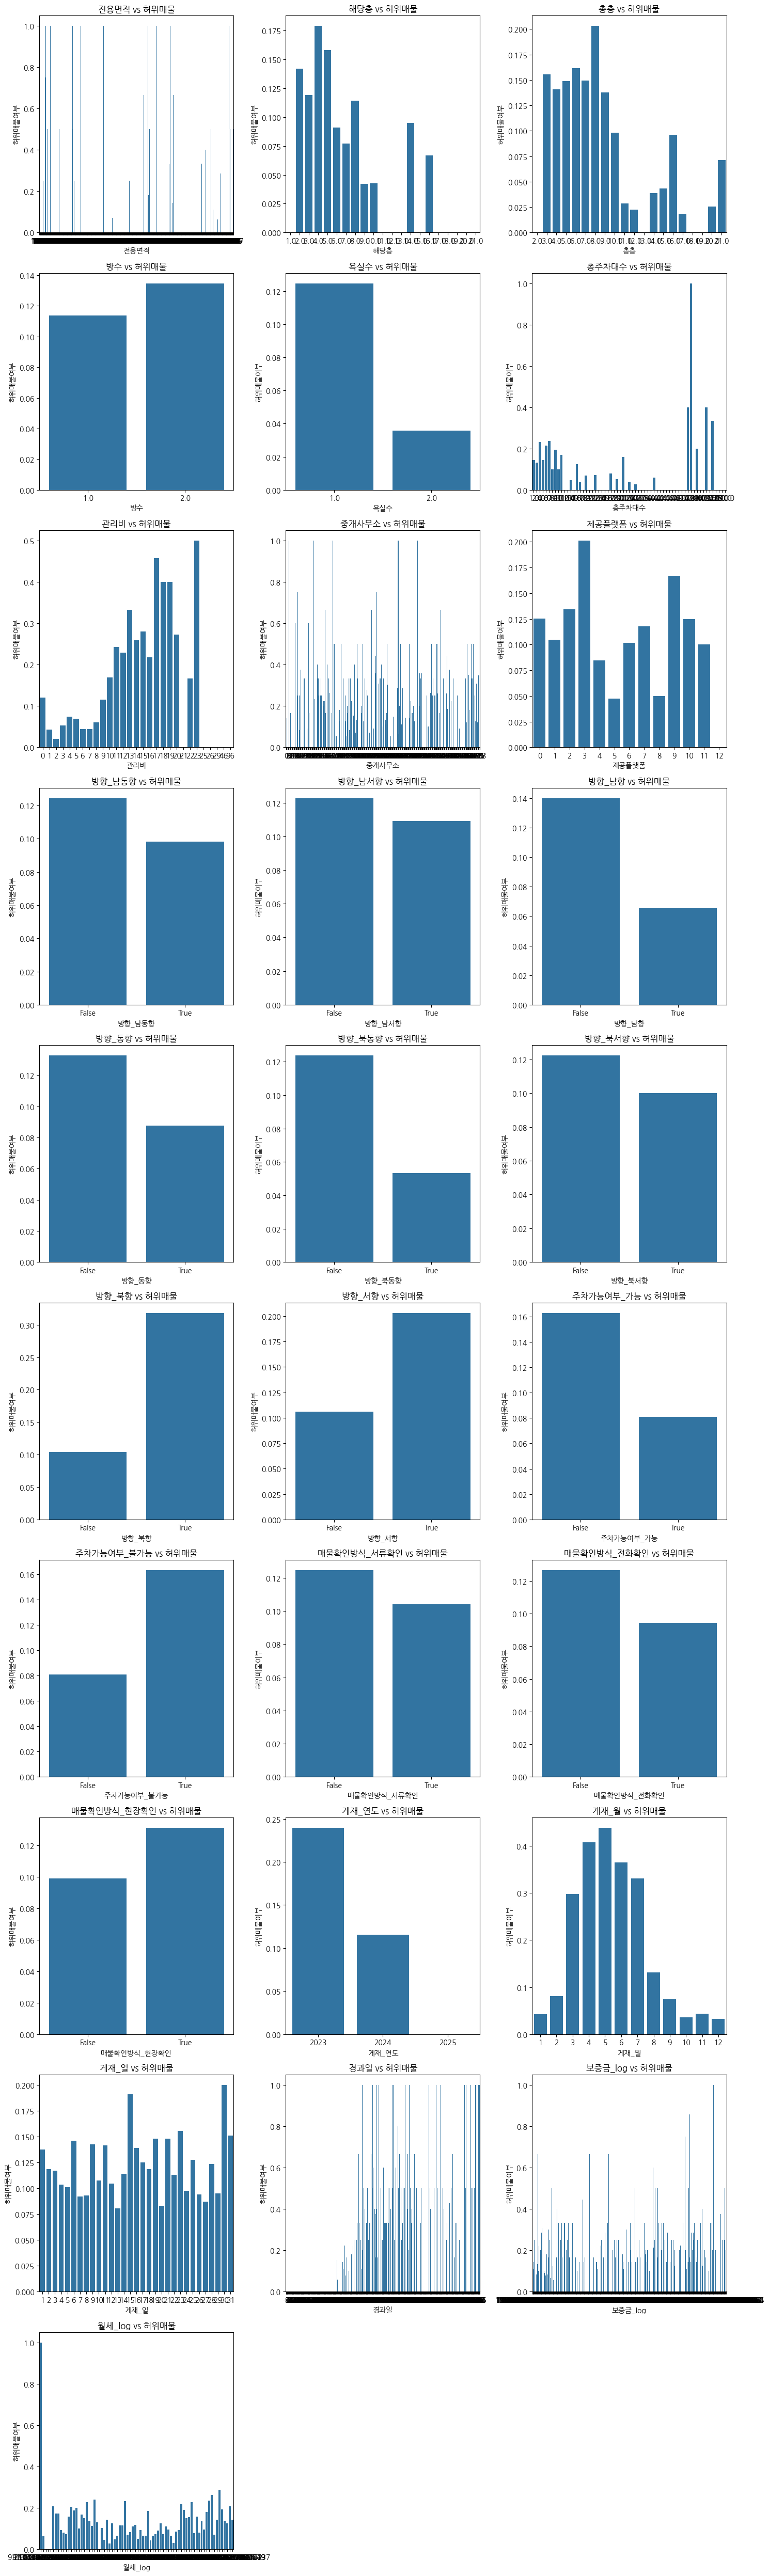

In [17]:
import math
categorical_cols = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '중개사무소', '제공플랫폼', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '주차가능여부_가능', '주차가능여부_불가능', '매물확인방식_서류확인', '매물확인방식_전화확인', '매물확인방식_현장확인', '게재_연도', '게재_월', '게재_일', '경과일', '보증금_log', '월세_log']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.barplot(x=train[col], y=train['허위매물여부'], errorbar=None)  # `ci=None` 대신 `errorbar=None`
    plt.title(f"{col} vs 허위매물")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

<ipython-input-26-809718507816>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-26-809718507816>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-26-809718507816>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-26-809718507816>:12: FutureWarning: 

Passing `palette` without assigning

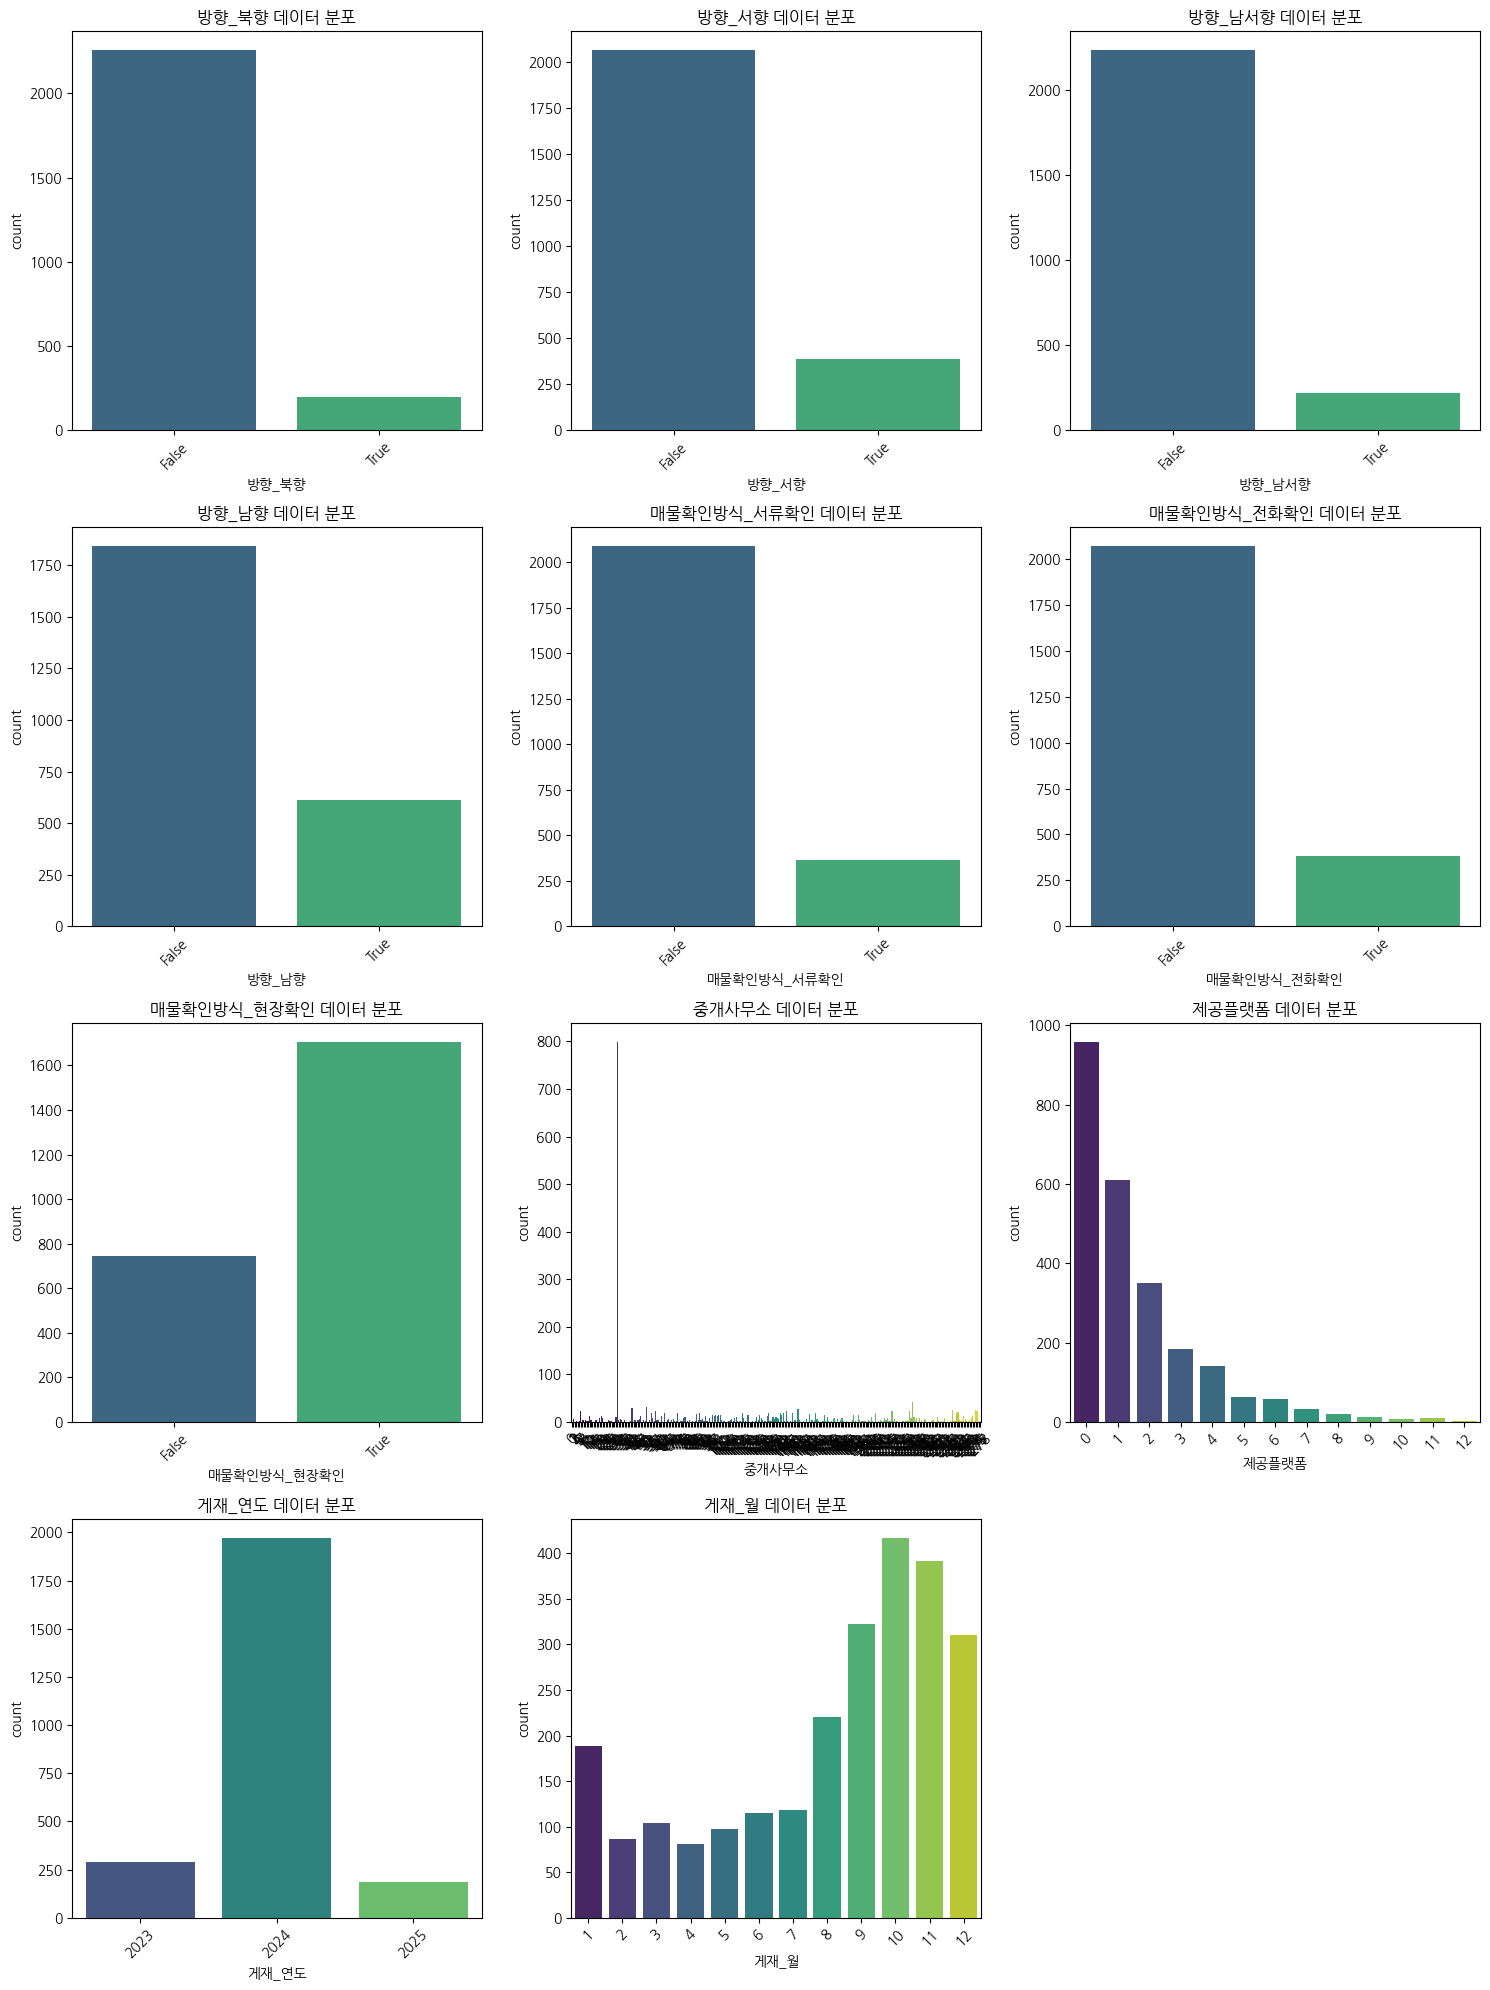

In [26]:
# 시각화할 범주형 변수 리스트
categorical_cols = ['방향_북향', '방향_서향', '방향_남서향', '방향_남향', '매물확인방식_서류확인', '매물확인방식_전화확인', '매물확인방식_현장확인', '중개사무소', '제공플랫폼', '게재_연도', '게재_월']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
    plt.xticks(rotation=45)  # X축 라벨 회전
    plt.title(f"{col} 데이터 분포")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [20]:
for col in categorical_cols:
    print(train.groupby(col)['허위매물여부'].mean().sort_values(ascending=False))
    print("="*50)

전용면적
29.87    1.0
18.32    1.0
45.22    1.0
18.61    1.0
44.83    1.0
        ... 
26.09    0.0
26.12    0.0
26.13    0.0
26.15    0.0
49.97    0.0
Name: 허위매물여부, Length: 800, dtype: float64
해당층
4.0     0.179078
5.0     0.158333
2.0     0.142012
3.0     0.119048
8.0     0.114286
14.0    0.095238
6.0     0.090909
7.0     0.076923
16.0    0.066667
10.0    0.042553
9.0     0.042254
1.0     0.000000
17.0    0.000000
20.0    0.000000
19.0    0.000000
18.0    0.000000
11.0    0.000000
15.0    0.000000
13.0    0.000000
12.0    0.000000
21.0    0.000000
Name: 허위매물여부, dtype: float64
총층
8.0     0.203008
6.0     0.161458
3.0     0.155629
7.0     0.149533
5.0     0.149091
4.0     0.140893
9.0     0.137681
10.0    0.098039
16.0    0.096154
21.0    0.071429
15.0    0.043478
14.0    0.038961
11.0    0.028571
20.0    0.025641
12.0    0.022727
17.0    0.018182
18.0    0.000000
19.0    0.000000
13.0    0.000000
2.0     0.000000
Name: 허위매물여부, dtype: float64
방수
2.0    0.134636
1.0    0.113651
Name: 허위매물여부,

# **250224 메모**

- 관리비, 보증금_log 높을수록 허위매물 많음
- 경과일
- 방향_북향
- 방향_서향
- 주차가능여부_불가능
- 게재_연도(2023년)
- 게재_월(봄~여름)
- 중개사무소
- 제공플랫폼

# **test 데이터 처리**

In [9]:
# 1. 결측치 처리 (train에서 구한 중앙값 사용)
cols_to_fill = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
test[cols_to_fill] = test[cols_to_fill].fillna(train[cols_to_fill].median())

# 2. 범주형 데이터 변환 (Label Encoding / One-Hot Encoding)
# 라벨인코딩 (train에서 학습한 LabelEncoder 적용)
label_cols = ['중개사무소', '제공플랫폼']
for col in label_cols:
    encoder = LabelEncoder()
    encoder.fit(train[col])  # train 데이터로 학습

    # test 데이터에서 train에 없는 값은 '미등록' 처리
    test[col] = test[col].apply(lambda x: x if x in encoder.classes_ else '미등록')

    # LabelEncoder에 '미등록' 추가 후 변환
    encoder.classes_ = np.append(encoder.classes_, '미등록')
    test[col] = encoder.transform(test[col])

# 원핫 인코딩 (방향, 주차가능여부, 매물확인방식)
test = pd.get_dummies(test, columns=['방향', '주차가능여부', '매물확인방식'])

# 3. 날짜 처리 (연/월/일 분리 및 경과일 계산)
test['게재일'] = pd.to_datetime(test['게재일'])
test['게재_연도'] = test['게재일'].dt.year
test['게재_월'] = test['게재일'].dt.month
test['게재_일'] = test['게재일'].dt.day

# 경과일 추가 (예: 2025년 1월 1일 기준)
test['경과일'] = (pd.to_datetime('2025-02-22') - test['게재일']).dt.days

# 4. 이상치 처리 (로그 변환)
test['보증금_log'] = np.log1p(test['보증금'])
test['월세_log'] = np.log1p(test['월세'])

# 필요 없는 원본 컬럼 삭제
test.drop(['게재일', '보증금', '월세'], axis=1, inplace=True)

# 확인
print(test.head())

         ID   전용면적  해당층    총층   방수  욕실수  총주차대수  관리비  중개사무소  제공플랫폼  ...  \
0  TEST_000  26.40  5.0   5.0  1.0  1.0   10.0    7    279     13  ...   
1  TEST_001  30.26  7.0  11.0  1.0  1.0   16.0   11    279     13  ...   
2  TEST_002  41.50  2.0   3.0  2.0  1.0   10.0    0    279     13  ...   
3  TEST_003  31.35  5.0   6.0  2.0  1.0   10.0    5    279     13  ...   
4  TEST_004  23.14  2.0   3.0  1.0  1.0   10.0    0    279     13  ...   

   주차가능여부_불가능  매물확인방식_서류확인  매물확인방식_전화확인  매물확인방식_현장확인  게재_연도  게재_월  게재_일  경과일  \
0        True         True        False        False   2024    10    21  124   
1        True         True        False        False   2023     9     2  539   
2        True        False        False         True   2024     4     3  325   
3       False         True        False        False   2024     9    19  156   
4        True        False        False         True   2024    11    10  104   

     보증금_log     월세_log  
0  19.222682  13.180634  
1  18.829474  13.28788

In [10]:
keep_cols = ['관리비', '경과일', '보증금_log', '방향_북향', '방향_서향', '주차가능여부_불가능', '게재_연도', '게재_월', '중개사무소', '제공플랫폼', '허위매물여부']

train = train[keep_cols]

In [11]:
train.head(5)

,관리비,경과일,보증금_log,방향_북향,방향_서향,주차가능여부_불가능,게재_연도,게재_월,중개사무소,제공플랫폼,허위매물여부
0,96,136,19.813206,False,True,False,2024,10,240,1,0
1,0,58,18.954246,False,False,True,2024,12,228,3,0
2,0,86,18.551709,False,False,True,2024,11,150,0,0
3,10,88,18.912324,False,False,False,2024,11,31,0,0
4,0,242,19.661949,False,False,True,2024,6,72,1,1


In [12]:
keep_cols_test = ['관리비', '경과일', '보증금_log', '방향_북향', '방향_서향', '주차가능여부_불가능', '게재_연도', '게재_월', '중개사무소', '제공플랫폼']

test = test[keep_cols_test]

3. Modeling

In [13]:
# Feature & Target 분리
X = train.drop(columns=['허위매물여부'])
y = train['허위매물여부']

In [14]:
# train 데이터 train/valid 분할 (8:2)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = rf_model.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.9430


In [16]:
# test 데이터 예측
test_X = test

In [17]:
# 예측 수행
test_predictions = rf_model.predict(test_X)

In [18]:
# 결과 확인
print(test_predictions[:10])  # 상위 10개 출력

[0 1 1 0 0 0 0 0 0 0]


5. 제출파일 생성

In [21]:
# 제출 파일 생성
sample_submission['허위매물여부'] = test_predictions

In [27]:
sample_submission = sample_submission.drop(columns=['허위매물예측'])

In [28]:
sample_submission.to_csv('250224_submission_RFC.csv', index=False, encoding='utf-8-sig')